# Exercise 4 - Advanced Statistics for Physics Analysis (A.Y. 2022-2023)
by Erica Brisigotti (2097202)

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
my_norm <- function(x){ x/( delta_p*sum(x) ) }

In [3]:
my_confidence_interval <- function(post_d,mu){
    cum_d <- cumsum(post_d)*delta_mu
    low_lim <- mu[which(cum_d >= 0.025)][1]
    up_lim <- mu[which(cum_d >= 0.975)][1]
    return (c(low_lim,up_lim))}

In [4]:
my_median <- function(post_d,mu){
    cum_d <- cumsum(post_d)*delta_mu
    d_median <- mu[which(cum_d >= 0.5)][1]
    return (d_median)}

## Exercise 1
The number of claims received by an insurance company during a week follows a Poisson distribution with unknown mean (µ). 

The number of claims, per week, observed ovr a ten week period are:
5, 8, 4, 6, 11, 6, 6, 5, 6, 4

In [5]:
vect <- c( 5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
delta_mu = 10**{-3}
mu <- seq( 0, 15, delta_mu )
stats <- data.frame( prior=NA, average=NA, median=NA, variance=NA, low_lim=NA, up_lim=NA )

a) Suppose to use a prior uniform distribution for µ

<span style="color:blue"> The uniform prior corresponds to a Gamma$(\alpha = 1, \lambda = 0)$. </span>

In [6]:
alpha_prior <- 1
lambda_prior <- 0

- find the posterior distribution for µ and compute the posterior mean, median and variance

<span style="color:blue"> Therefore, the corresponding posterior is a Gamma$(\alpha^\prime = \alpha + \sum y_i, \lambda^\prime = \lambda + n)$ where $\left\{ y_i \right\}_{i=1}^n$ are the measurements. </span>

<span style="color:blue"> A Gamma$(\alpha,\lambda)$ is known to have mean $\frac{\alpha}{\lambda}$ and variance $\frac{\alpha}{\lambda^2}$.

In [7]:
s <- sum(vect)
n <- length(vect) 
alpha_post <- alpha_prior + s
lambda_post <- lambda_prior + n
post_d <- dgamma(mu,alpha_post,lambda_post)
# for the average and the variance, I resort to the formulas
post_mean <- alpha_post/lambda_post
cat("the average number of claims per week µ is ",post_mean)
post_var <-  alpha_post/lambda_post**2
cat("\nthe variance of the distribution of number of claims per week µ is ",post_var)
# for the median, I calculate it manually
post_median <- my_median(post_d,mu)
cat("\nthe median of the distribution of number of of claims per week µ is ",post_median)

the average number of claims per week µ is  6.2
the variance of the distribution of number of claims per week µ is  0.62
the median of the distribution of number of of claims per week µ is  6.167

- plot the posterior distribution and the 95% credibility interval

In [8]:
limits <- my_confidence_interval(post_d,mu)
cat("the 95% confidence interval for the distribution is [",limits[1],",",limits[2],"]")
stats[1,] = c('uniform', post_mean, post_median, post_var, limits[1], limits[2] )

the 95% confidence interval for the distribution is [ 4.754 , 7.836 ]

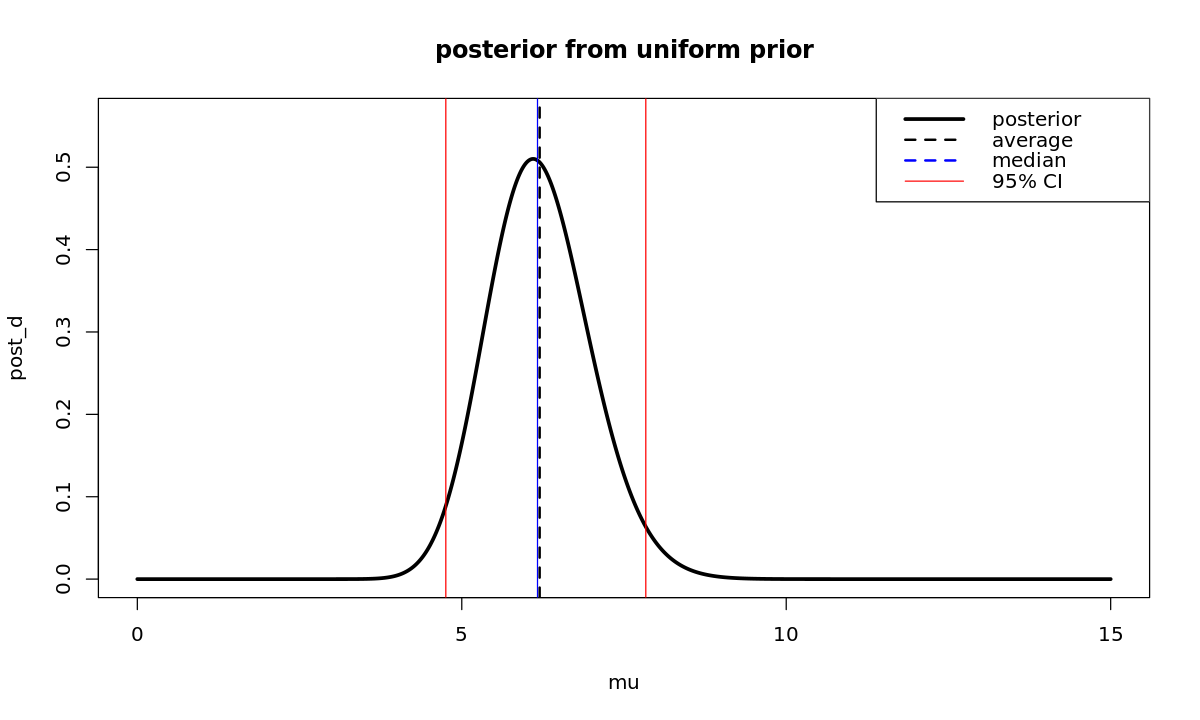

In [9]:
# lastly, I plot my results
options(repr.plot.width=10, repr.plot.height=6)
plot(mu,post_d,main='posterior from uniform prior',type="l", lwd=3, col="black", ylim=c(0,max(post_d)*1.1) )
abline(v=post_mean, col='black',lwd=2,lty=2)
abline(v=post_median, col='blue',lwd=1,lty=1)
abline(v=limits[1], col='red',lwd=1,lty=1)
abline(v=limits[2], col='red',lwd=1,lty=1)
legend("topright", legend=c("posterior","average","median","95% CI"), col=c('black','black','blue','red'), 
       lty = c(1, 2, 2, 1), lwd=c(3,2,2,1))

b) Suppose to use a Jeffreys' prior for $\mu$
$$ g(\mu) \propto \frac{1}{\sqrt{\mu}}$$

<span style="color:blue"> The Jeffrey's prior corresponds to a Gamma$(\alpha = \tfrac{1}{2}, \lambda = 0)$. </span>

In [10]:
alpha_prior <- 1/2
lambda_prior <- 0

<span style="color:blue"> Therefore, the corresponding posterior is a Gamma$(\alpha^\prime = \alpha + \sum y_i, \lambda^\prime = \lambda + n)$ where $\left\{ y_i \right\}_{i=1}^n$ are the measurements. </span>

- find the posterior distribution for µ and compute the posterior mean, median and variance

In [11]:
s <- sum(vect)
n <- length(vect) 
alpha_post <- alpha_prior + s
lambda_post <- lambda_prior + n
post_d <- dgamma(mu,alpha_post,lambda_post)
# for the average and the variance, I resort to the formulas
post_mean <- alpha_post/lambda_post
cat("the average number of claims per week µ is ",post_mean)
post_var <-  alpha_post/lambda_post**2
cat("\nthe variance of the distribution of number of claims per week µ is ",post_var)
# for the median, I calculate it manually
post_median <- my_median(post_d,mu)
cat("\nthe median of the distribution of number of of claims per week µ is ",post_median)

the average number of claims per week µ is  6.15
the variance of the distribution of number of claims per week µ is  0.615
the median of the distribution of number of of claims per week µ is  6.117

- plot the posterior distribution and the 95% credibility intervalplot the posterior distribution and the 95% credibility interval

In [12]:
limits <- my_confidence_interval(post_d,mu)
cat("the 95% confidence interval for the distribution is [",limits[1],",",limits[2],"]")
stats[2,] = c('Jeffreys', post_mean, post_median, post_var, limits[1], limits[2] )

the 95% confidence interval for the distribution is [ 4.71 , 7.779 ]

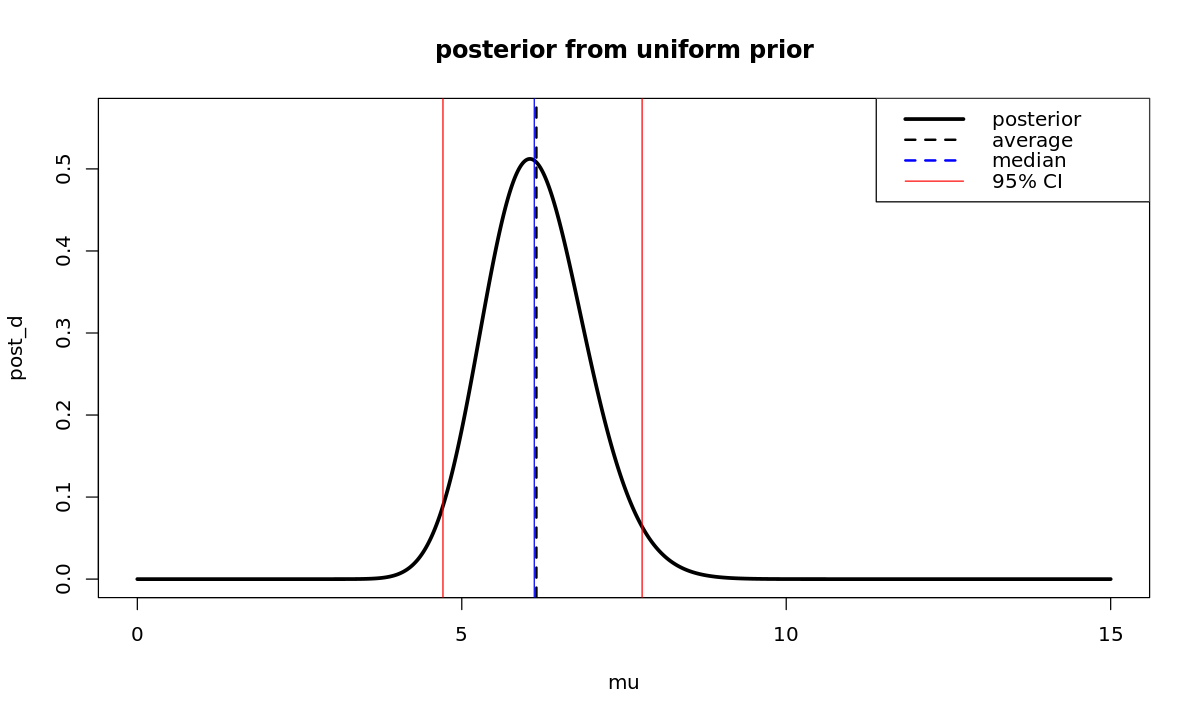

In [13]:
# lastly, I plot my results
options(repr.plot.width=10, repr.plot.height=6)
plot(mu,post_d,main='posterior from uniform prior',type="l", lwd=3, col="black", ylim=c(0,max(post_d)*1.1) )
abline(v=post_mean, col='black',lwd=2,lty=2)
abline(v=post_median, col='blue',lwd=1,lty=1)
abline(v=limits[1], col='red',lwd=1,lty=1)
abline(v=limits[2], col='red',lwd=1,lty=1)
legend("topright", legend=c("posterior","average","median","95% CI"), col=c('black','black','blue','red'), 
       lty = c(1, 2, 2, 1), lwd=c(3,2,2,1))

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same
mean and standard deviation

In [14]:
stats %>% mutate( average=as.numeric(average), median=as.numeric(median), variance=as.numeric(variance),
                 low_lim=as.numeric(low_lim), up_lim=as.numeric(up_lim) ) -> stats

stats[3,] = c('uniform_normal_approx',stats[1,"average"], stats[1,"median"], stats[1,"variance"],
              stats[1,"average"]-1.96*(stats[1,"variance"])**0.5,
              stats[1,"average"]+1.96*(stats[1,"variance"])**0.5 )

stats %>% mutate( average=as.numeric(average), median=as.numeric(median), variance=as.numeric(variance),
                 low_lim=as.numeric(low_lim), up_lim=as.numeric(up_lim) ) -> stats

stats[4,] = c('Jeffreys_normal_approx', stats[2,"average"], stats[2,"median"], stats[2,"variance"],
              stats[2,"average"]-1.96*(stats[2,"variance"])**0.5,
              stats[2,"average"]+1.96*(stats[2,"variance"])**0.5 )


stats %>% mutate( average=as.numeric(average), median=as.numeric(median), variance=as.numeric(variance),
                 low_lim=as.numeric(low_lim), up_lim=as.numeric(up_lim) ) -> stats
stats

,prior,average,median,variance,low_lim,up_lim
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,uniform,6.20,6.167,0.620,4.754000,7.836000
2,Jeffreys,6.15,6.117,0.615,4.710000,7.779000
3,uniform_normal_approx,6.20,6.167,0.620,4.656694,7.743306
4,Jeffreys_normal_approx,6.15,6.117,0.615,4.612930,7.687070


<span style="color:blue"> In both instances, the limits of the 95% confidence interval from normal approximation are slightly tighter than the original ones. </span>

## Exercise 2A

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.

A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method

In [15]:
traditional_p = 15/100
n_tot = 75

- what is the probability distribution of y, the number of times the new method fails to detect the disease?

<span style="color:blue"> The number of false negatives $y$ is distributed as a binomial distribution of probability 
    $$p=\frac{n_{\text{false negatives}}}{n_{\text{tot}}} \;\; \text{where} \;\; n_{tot}=75 $$ </span>

- on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?

In [16]:
n_false_negative <- 6

In [17]:
freq_p <- n_false_negative/n_tot
freq_sigma <- freq_p*(1-freq_p)/n_tot
cat("the frequentist estimator of the failure probability is p =",round(freq_p,3),"±",round(freq_sigma,3))

the frequentist estimator of the failure probability is p = 0.08 ± 0.001

- setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

In [18]:
# I compute the parameters of the prior distribution from the mean value and standard deviation
mean_prior <- 0.15
sigma_prior <- 0.14
alpha_prior <- mean_prior*( mean_prior*(1-mean_prior)/sigma_prior**2 -1 )
beta_prior <- alpha_prior*( 1/mean_prior - 1)

<span style="color:blue"> I exploit the properties of beta distribution in binomial inference: given a beta$(\alpha,\beta)$ as a prior, the posterior distribution is a beta$(\alpha^\prime,\beta^\prime)$ where $$ \alpha^\prime = \alpha+n_{\text{false negatives}} \;\; , \;\; \beta^\prime = \beta+n_\text{tot}-n_{\text{false negatives}}$$ </span>

In [19]:
# I define the parameters of the posterior
alpha_post <- alpha_prior + n_false_negative
beta_post <- beta_prior + n_tot - n_false_negative
# and, finally, plot it
delta_p <- 10**(-3) 
p <- seq(0,1,delta_p)
post_dist <- my_norm(dbeta(p,alpha_post,beta_post))
mean_post <- alpha_post/(alpha_post+beta_post)

In [20]:
limits <- my_confidence_interval(post_dist,p)

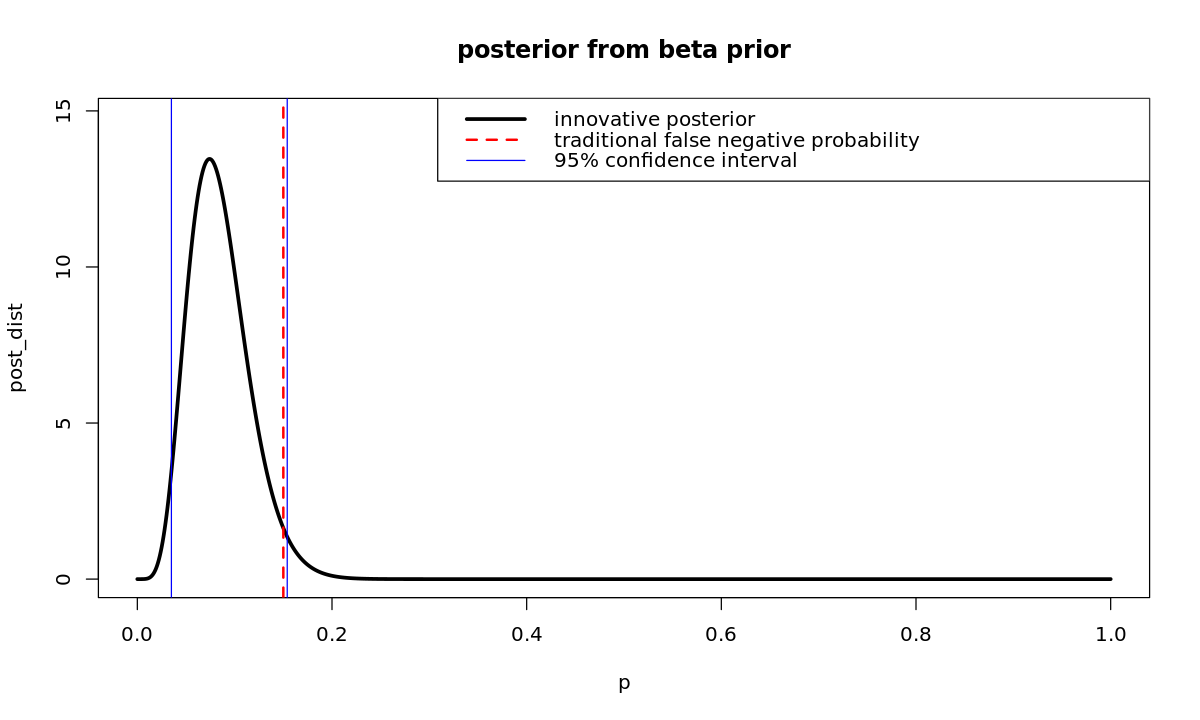

In [21]:
options(repr.plot.width=10, repr.plot.height=6)
plot(p, post_dist, main='posterior from beta prior',type="l", lwd=3, col="black", ylim=c(0,max(post_dist)*1.1) )
abline(v=traditional_p, col='red',lwd=2,lty=2)
abline(v=limits[1], col='blue',lwd=1,lty=1)
abline(v=limits[2], col='blue',lwd=1,lty=1)
legend("topright", legend=c("innovative posterior","traditional false negative probability","95% confidence interval"),
       col=c('black','red','blue'), lty = c(1,2,1), lwd=c(3,2,1))

- Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way

<span style="color:blue"> I want to perform a one-side hypothesis test to potentially verify that the test innovative test is better than the traditional method. To do that, I define the null hypothesis $H_0$ as the innovative text being no better than the traditional method. In this way, the alternative hypothesis $H_1$ is that the innovative test is better than the traditional method. </span>

<span style="color:blue"> So, I evaluate the posterior probability of the null hypothesis by integrating over the corresponding region $p \geq 0.15$. Finally, I compare the result to the significance level $\alpha = 5\%$ to make my draw conclusions.

In [22]:
alpha = 0.05
cumsum_dist <- cumsum(post_dist)*delta_mu
p0 <- p[which(cumsum_dist >= traditional_p)][1]
cat('Since the result of the test hypothesis',p0,'is greater than the significance level',alpha,', I cannot reject the null
hypothesis at',alpha*100,"% significance level.")

Since the result of the test hypothesis 0.053 is greater than the significance level 0.05 , I cannot reject the null
hypothesis at 5 % significance level.

- Perform the same hypothesis test in the classical frequentist way

<span style="color:blue"> Just like before, I want to perform a one-side hypothesis test in which the null hypothesis $H_0$ is that the innovative text being no better than the traditional method and the significance level is $\alpha = 5\%$. </span>

<span style="color:blue"> So, I consider the frequentist estimator and the corresponding binomial probability, to calculate the p-value.  Finally, I compare the result to the significance level $\alpha = 5\%$ to make my draw conclusions.

In [23]:
alpha <- 0.05
freq_x <- seq(1,n_tot,1)
freq_dist <- dbinom(freq_x,n_tot,freq_p)

In [24]:
level <- round(traditional_p*n_tot)
freq_cumsum <- cumsum(freq_dist)*delta_mu
p_val <- sum(freq_dist[which(freq_x >= level)])
cat('Since the p-value',round(p_val,3),'of the test hypothesis is smaller than the significance level',alpha,
    ', I can reject the null hypothesis.',
    " Therefore, the alternative hypothesis (innovative test returns less false negatives than the traditional one) is true.")

Since the p-value 0.036 of the test hypothesis is smaller than the significance level 0.05 , I can reject the null hypothesis.  Therefore, the alternative hypothesis (innovative test returns less false negatives than the traditional one) is true.

## Exercise 2B
Given the problem of the lightouse discussed last week, study the case in which both the position
along the shore (α) and the distance out at sea (β) are unknown

In [45]:
n_meas = c(1,2,5,10,20,50,100) # maybe also 250, 500, 1000

In [55]:
# firstly, I generate data with known parameters alpha and beta
alpha_0 <- 1
beta_0 <- 1
set.seed(01234)
thetas <- runif(max(n_meas),-pi/2,pi/2)
meas <- beta_0*tan(thetas)+beta_0

In [56]:
# based on rough observations
x_low <- -1
x_up <- +2
y_low <- 0.2
y_up <- 4
# I initialize a range of parameters, of which I want to evaluate the most likely:
n_samples <- 500
delta_x <- (x_up-x_low)/n_samples
delta_y <- (y_up-y_low)/n_samples
alpha <- seq(from=x_low, by=delta_x, length.out=n_samples+1)
beta <- seq(from=y_low, by=delta_y, length.out=n_samples+1)

In [60]:
# to estimate the two parameters, I'll be using the log-likelihood
my_log_like <- function(data,alpha,beta){
    L <- length(data)
    temp <- vector(length = L)
    for (idx in 1:L){
        temp[idx] <- -log( 1 + ((data[idx]-alpha)/beta)**2 ) }
    log_like <- sum(temp)
    return (log_like) }

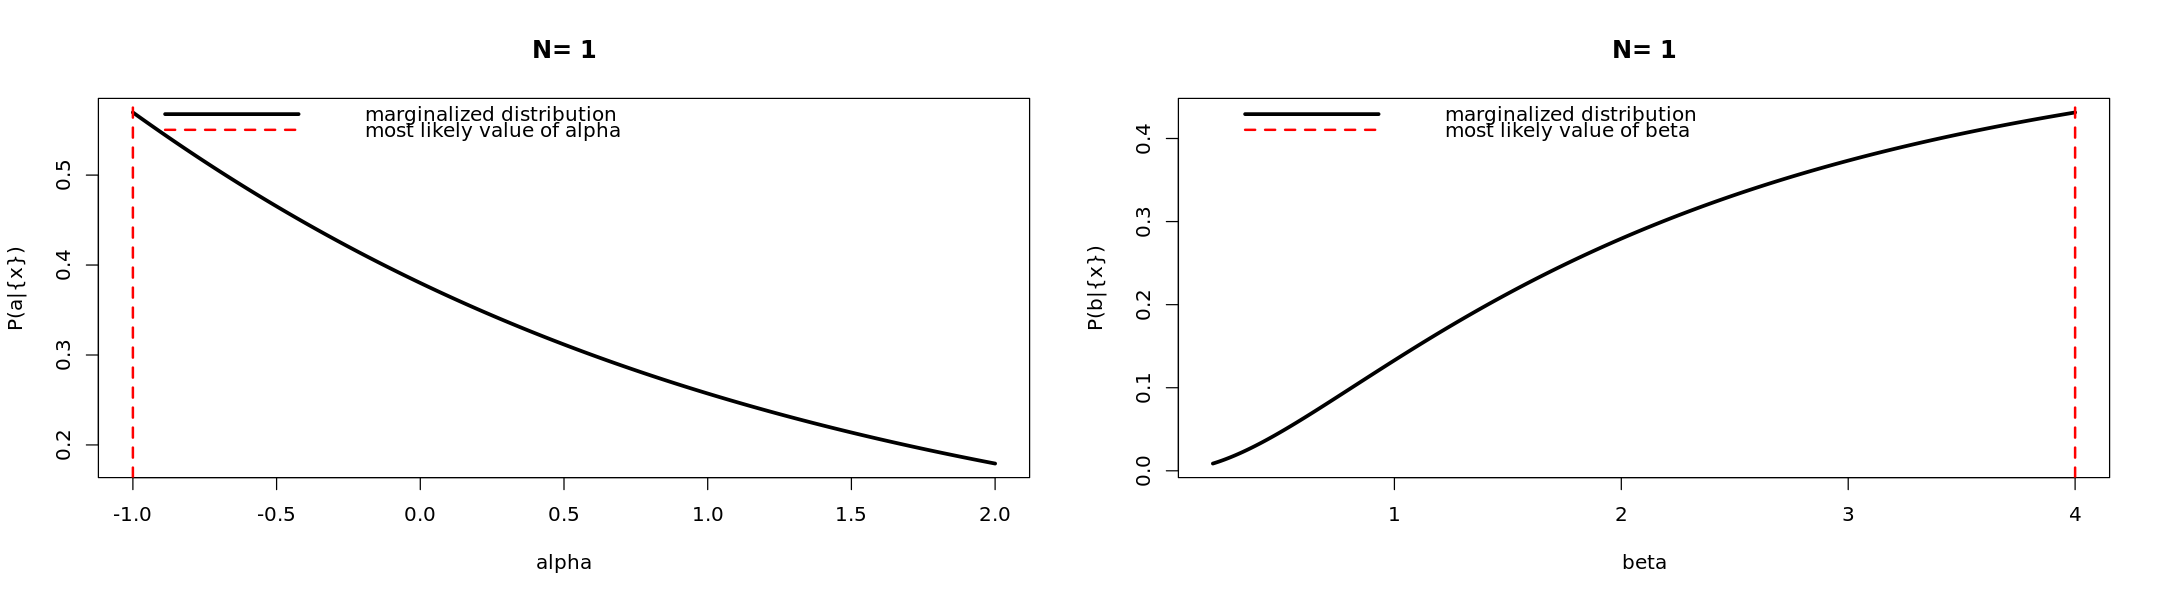

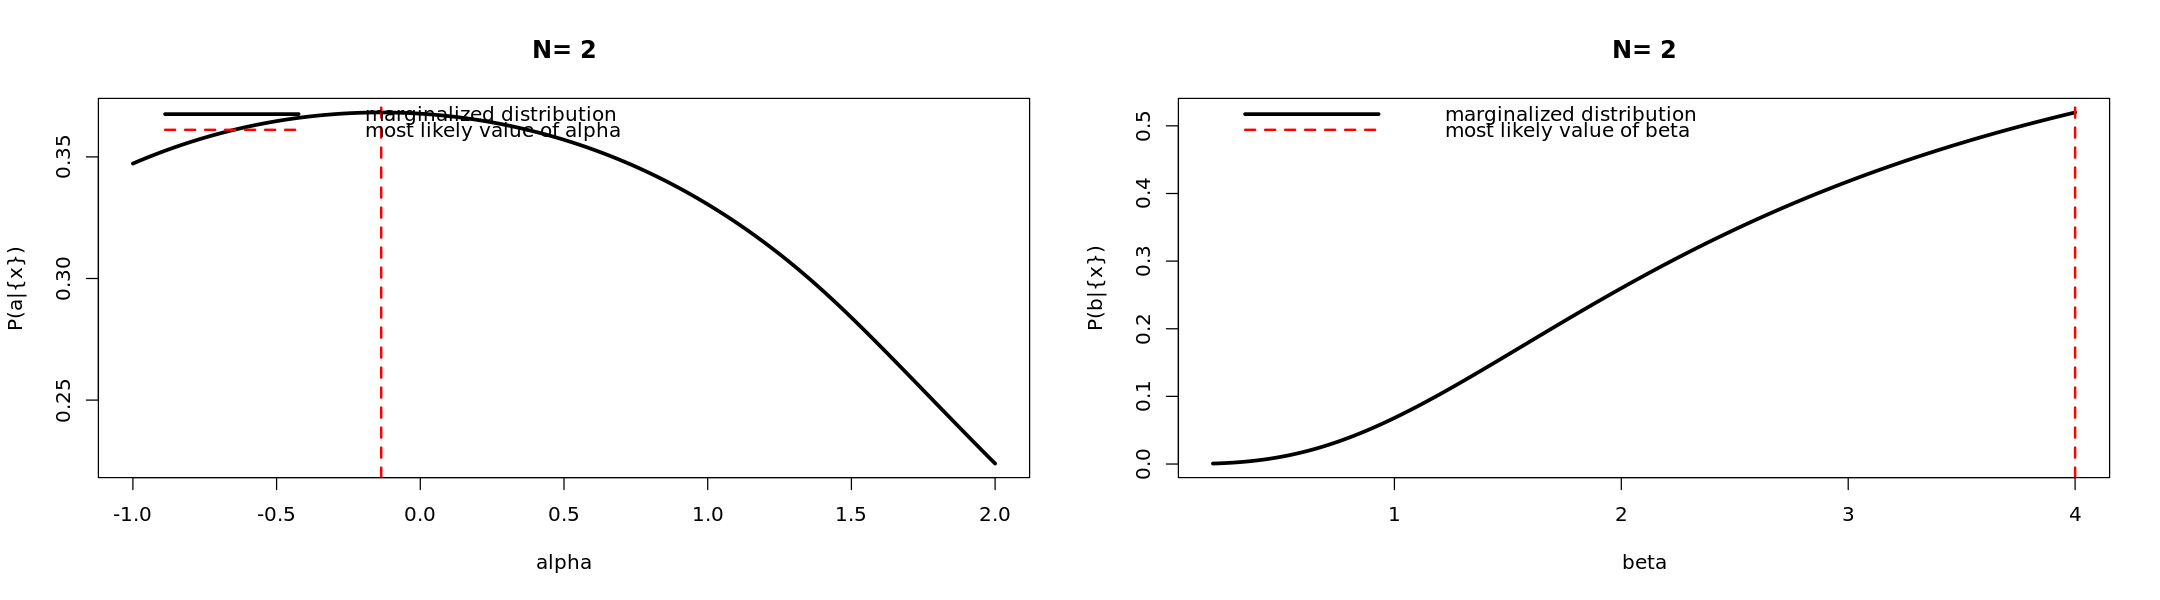

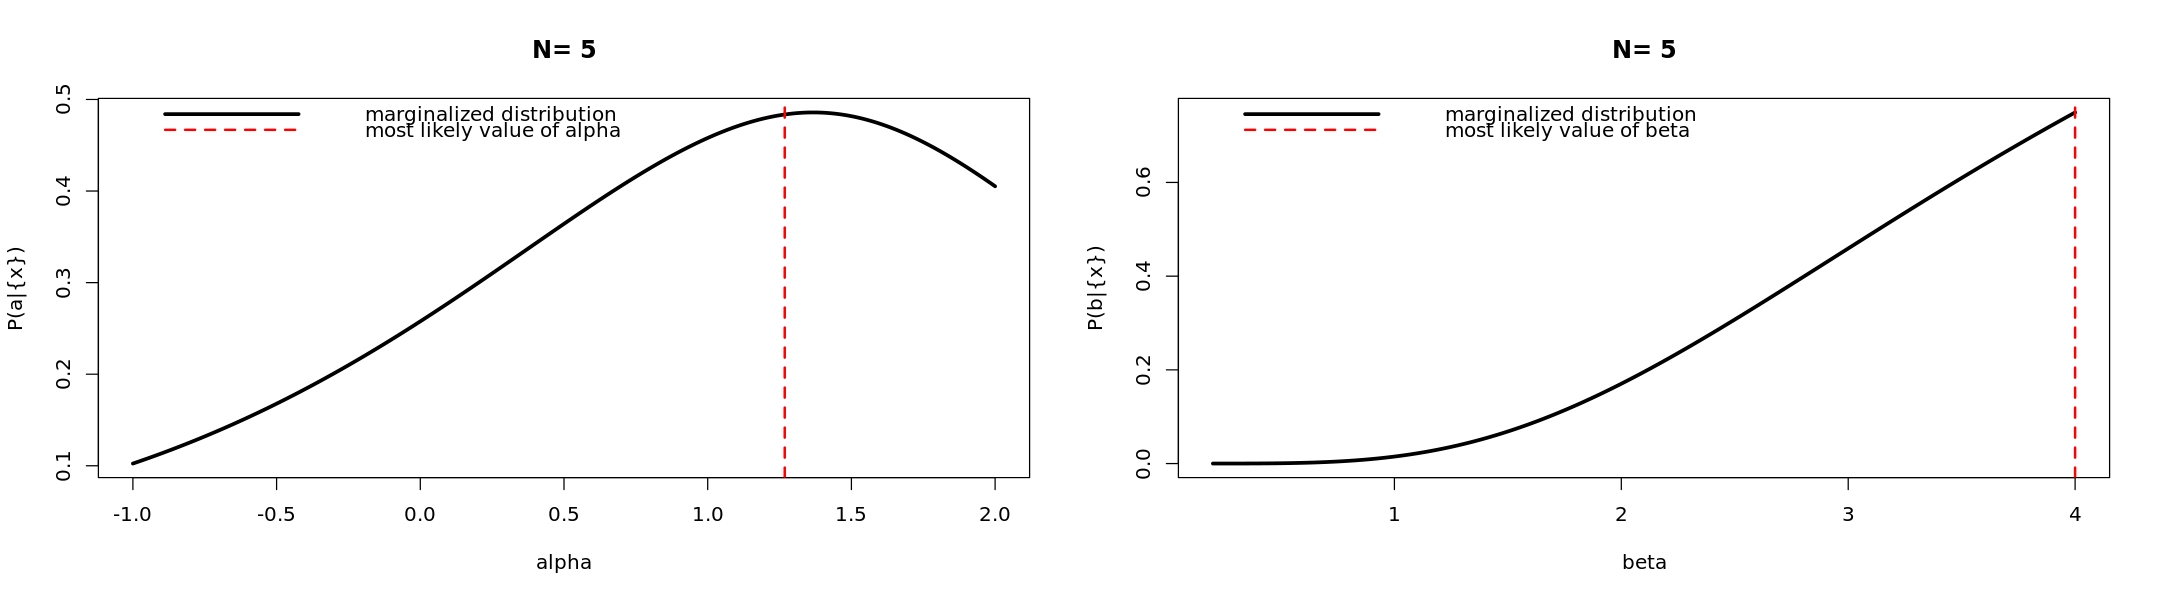

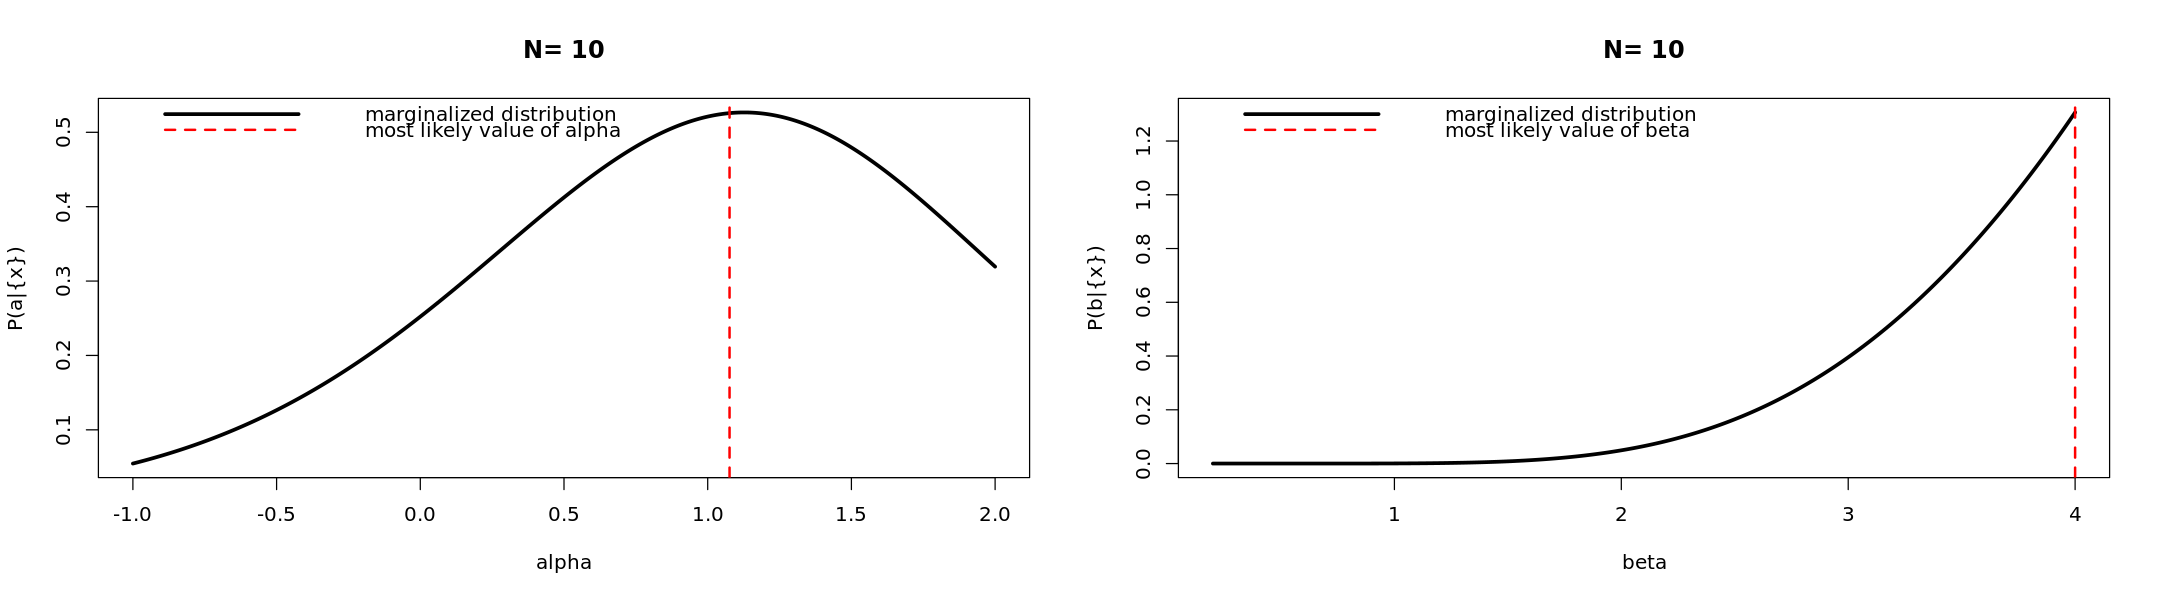

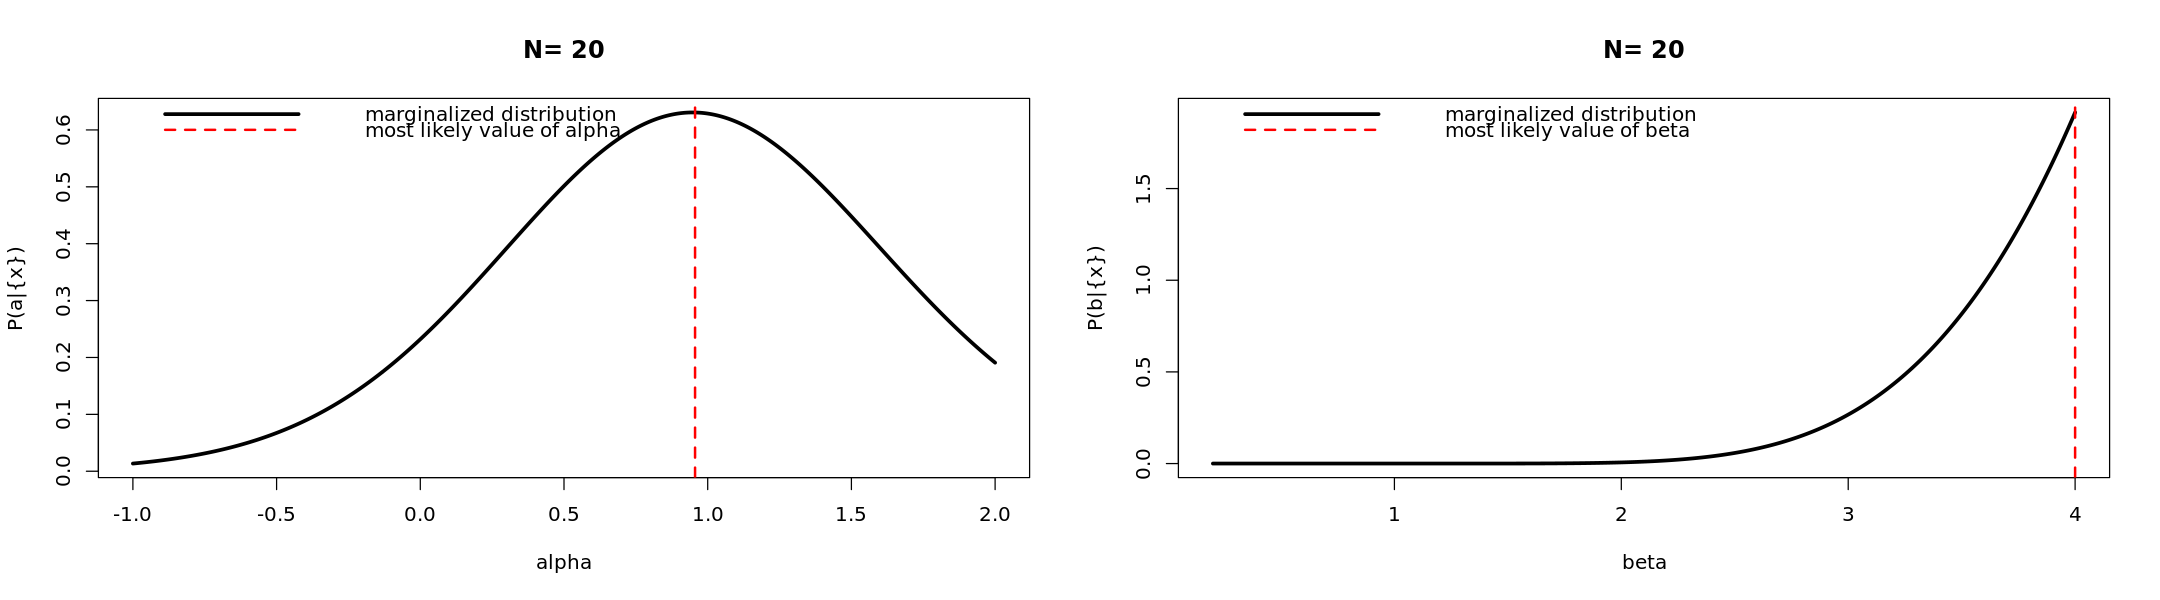

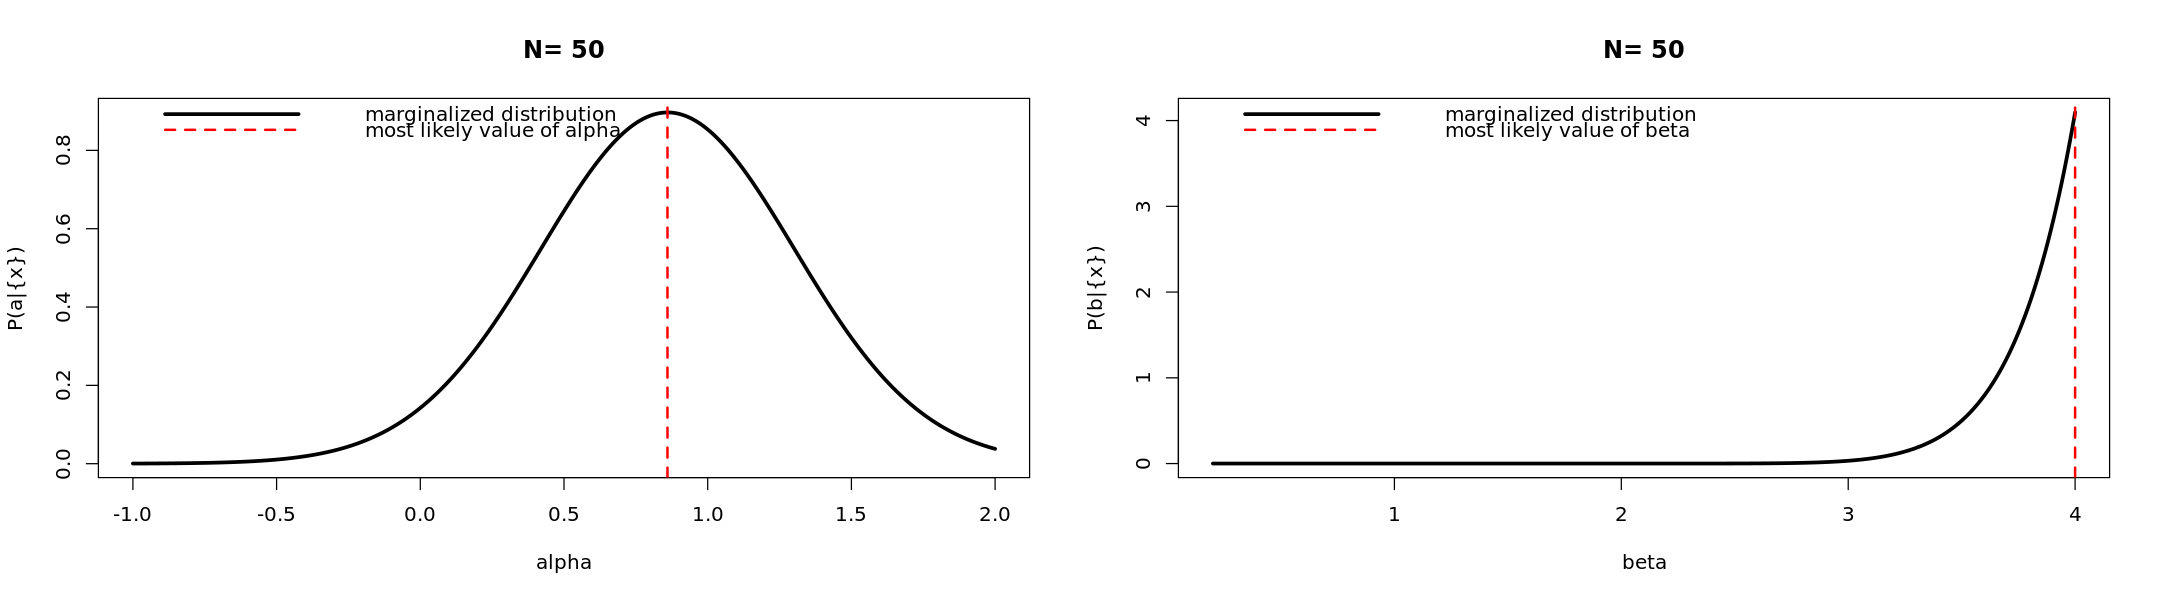

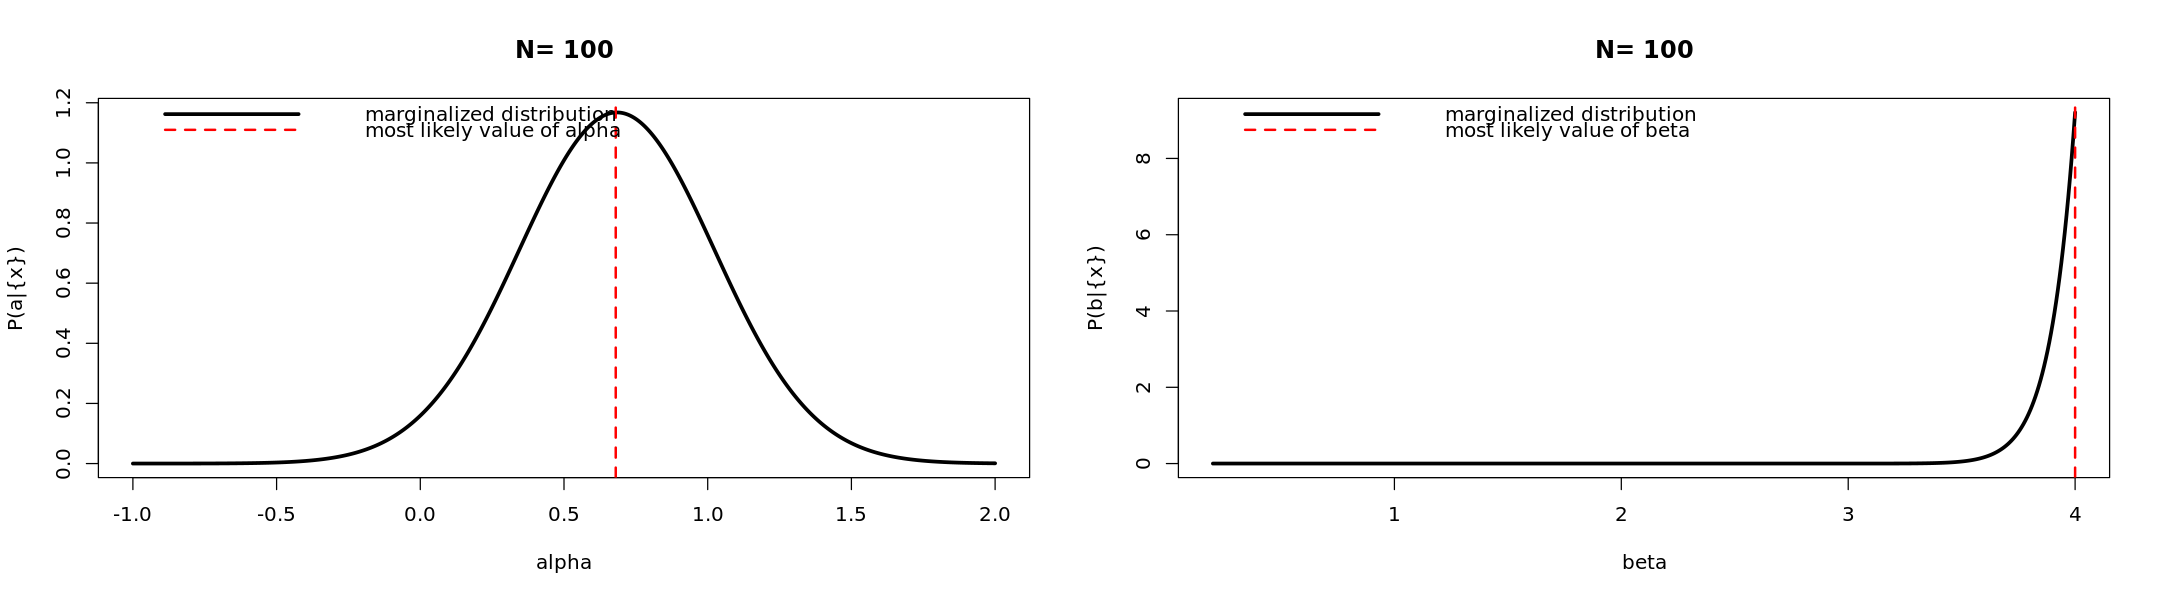

In [61]:
# the probability distributions for each parameter depends on the amount of data considered
# for every subset of measurements
for (example in 1:length(n_meas)){
# I get the corresponding data
    n <- n_meas[example]
    data <- meas[1:n]
# and calculate the log likelihood for each combination of data, which I save in a matrix
    log_like <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    for (i in 1:length(alpha)){
        for (j in 1:length(beta)){
            log_like[i,j] = my_log_like(data,alpha[i],beta[j]) } }
# I then identify the most likely combination of parameters
    most_likely_alpha_idx <- which(log_like == max(log_like), arr.ind = TRUE)[1]
    most_likely_beta_idx <- which(log_like == max(log_like), arr.ind = TRUE)[2]
    most_likely_alpha <- alpha[most_likely_alpha_idx]
    most_likely_beta <- beta[most_likely_beta_idx]
# and marginalize (+ normalize), one at a time, the posterior distributions to display them
    p_alpha <- apply(exp(log_like), 1, sum)
    p_alpha <- p_alpha/(delta_x*sum(p_alpha))
    p_beta <- apply(exp(log_like), 2, sum)
    p_beta <- p_beta/(delta_y*sum(p_beta))
# and, finally, represent it
    options( repr.plot.width=18, repr.plot.height=5)
    par( mfrow=c(1,2) )
# for alpha
    plot( alpha, p_alpha, xlab='alpha', ylab='P(a|{x})',type='l', lwd=3, col="black", main=c(paste('N=',n)) )
    abline( v=most_likely_alpha, col='red', lwd=2, lty=2)
    legend("topleft", legend=c("marginalized distribution","most likely value of alpha"),
       col=c('black','red'), lty = c(1, 2), lwd=c(3,2), bty='n' )
# for beta
    plot( beta, p_beta, xlab='beta', ylab='P(b|{x})',type='l', lwd=3, col="black", main=c(paste('N=',n)) )
    abline( v=most_likely_beta, col='red', lwd=2, lty=2)
    legend("topleft", legend=c("marginalized distribution","most likely value of beta"),
       col=c('black','red'), lty = c(1, 2), lwd=c(3,2), bty='n') }

## Exercise 3
Given the Signal over Background example discussed last week, analyze and discuss the following
cases:

- vary the sampling resolution of used to generate the data, keeping the same sampling range 

xdat <- seq(from=-7*w, to=7*w, by=0.5*w)

- change the resolution w = {0.1, 0.25, 1, 2, 3}

- check the effect on the results

- change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior). Check the effect on the results

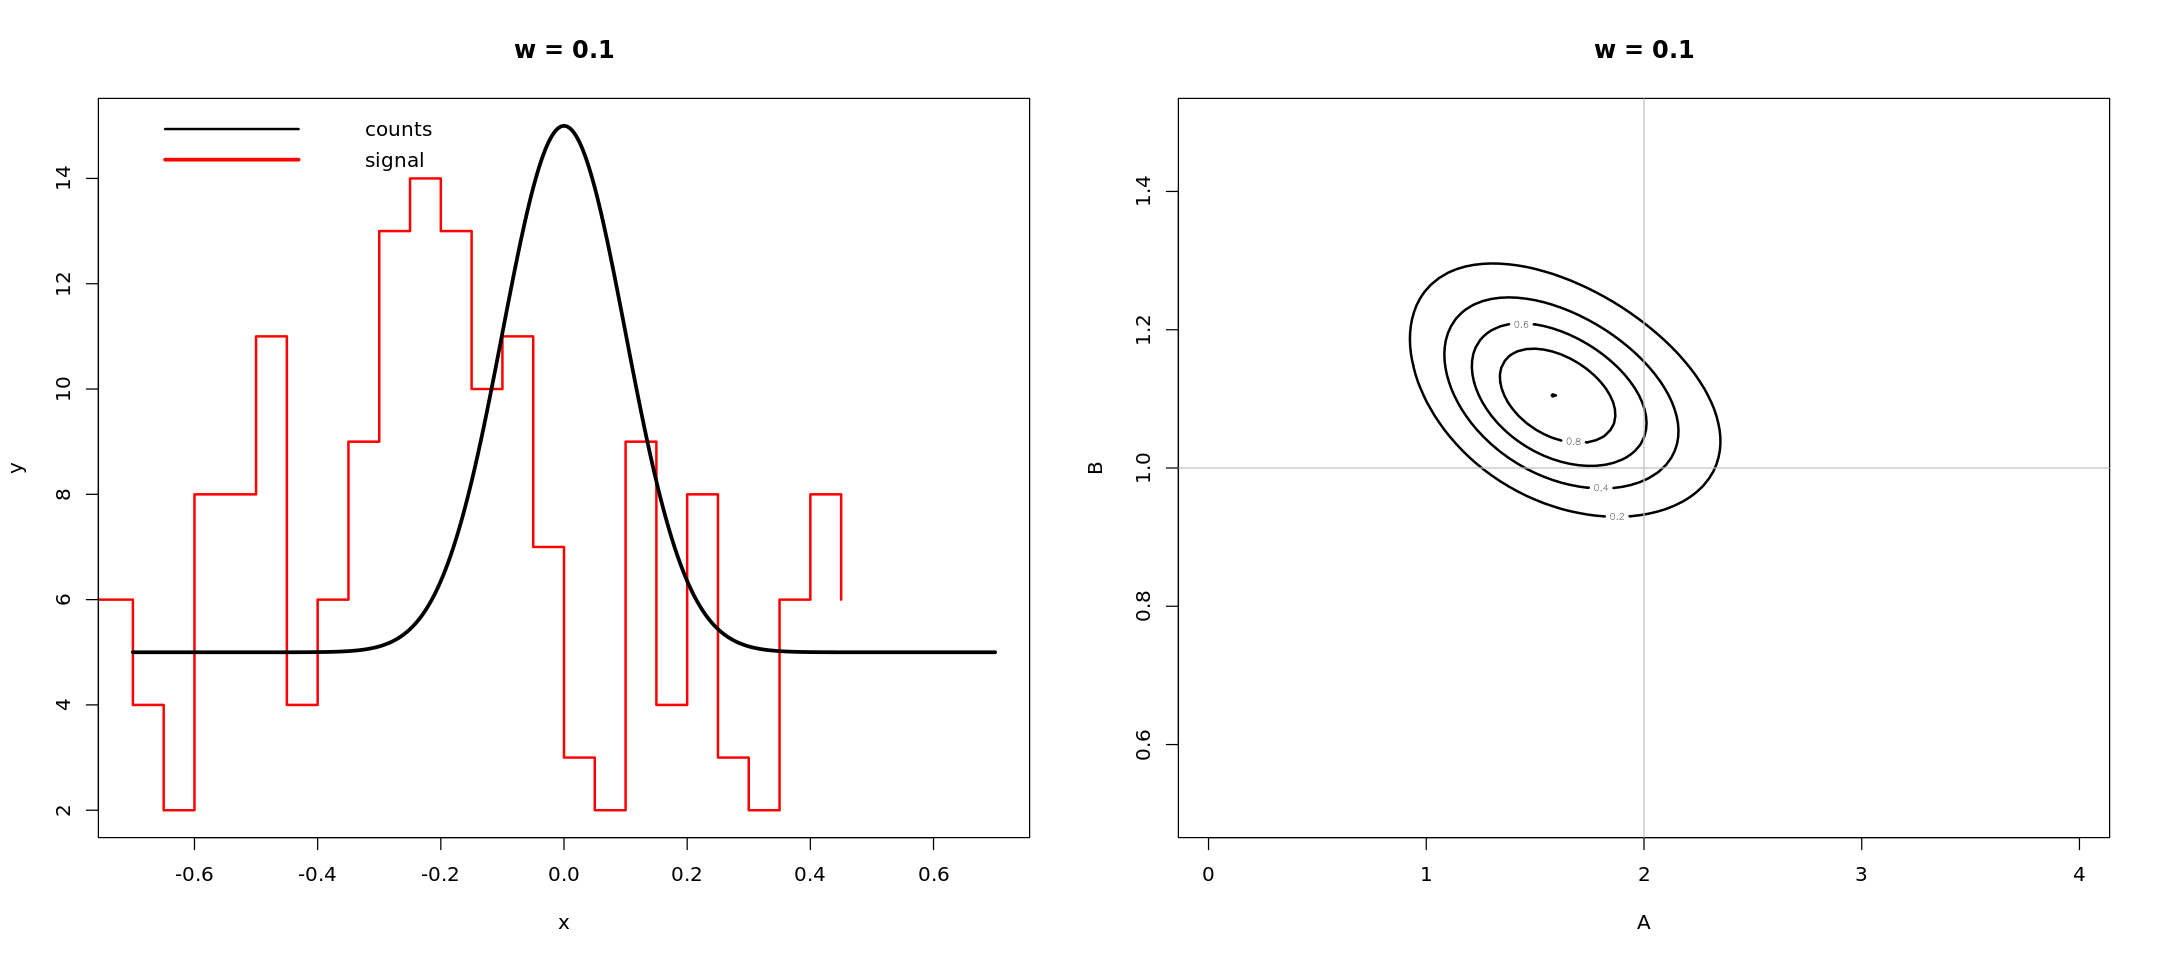

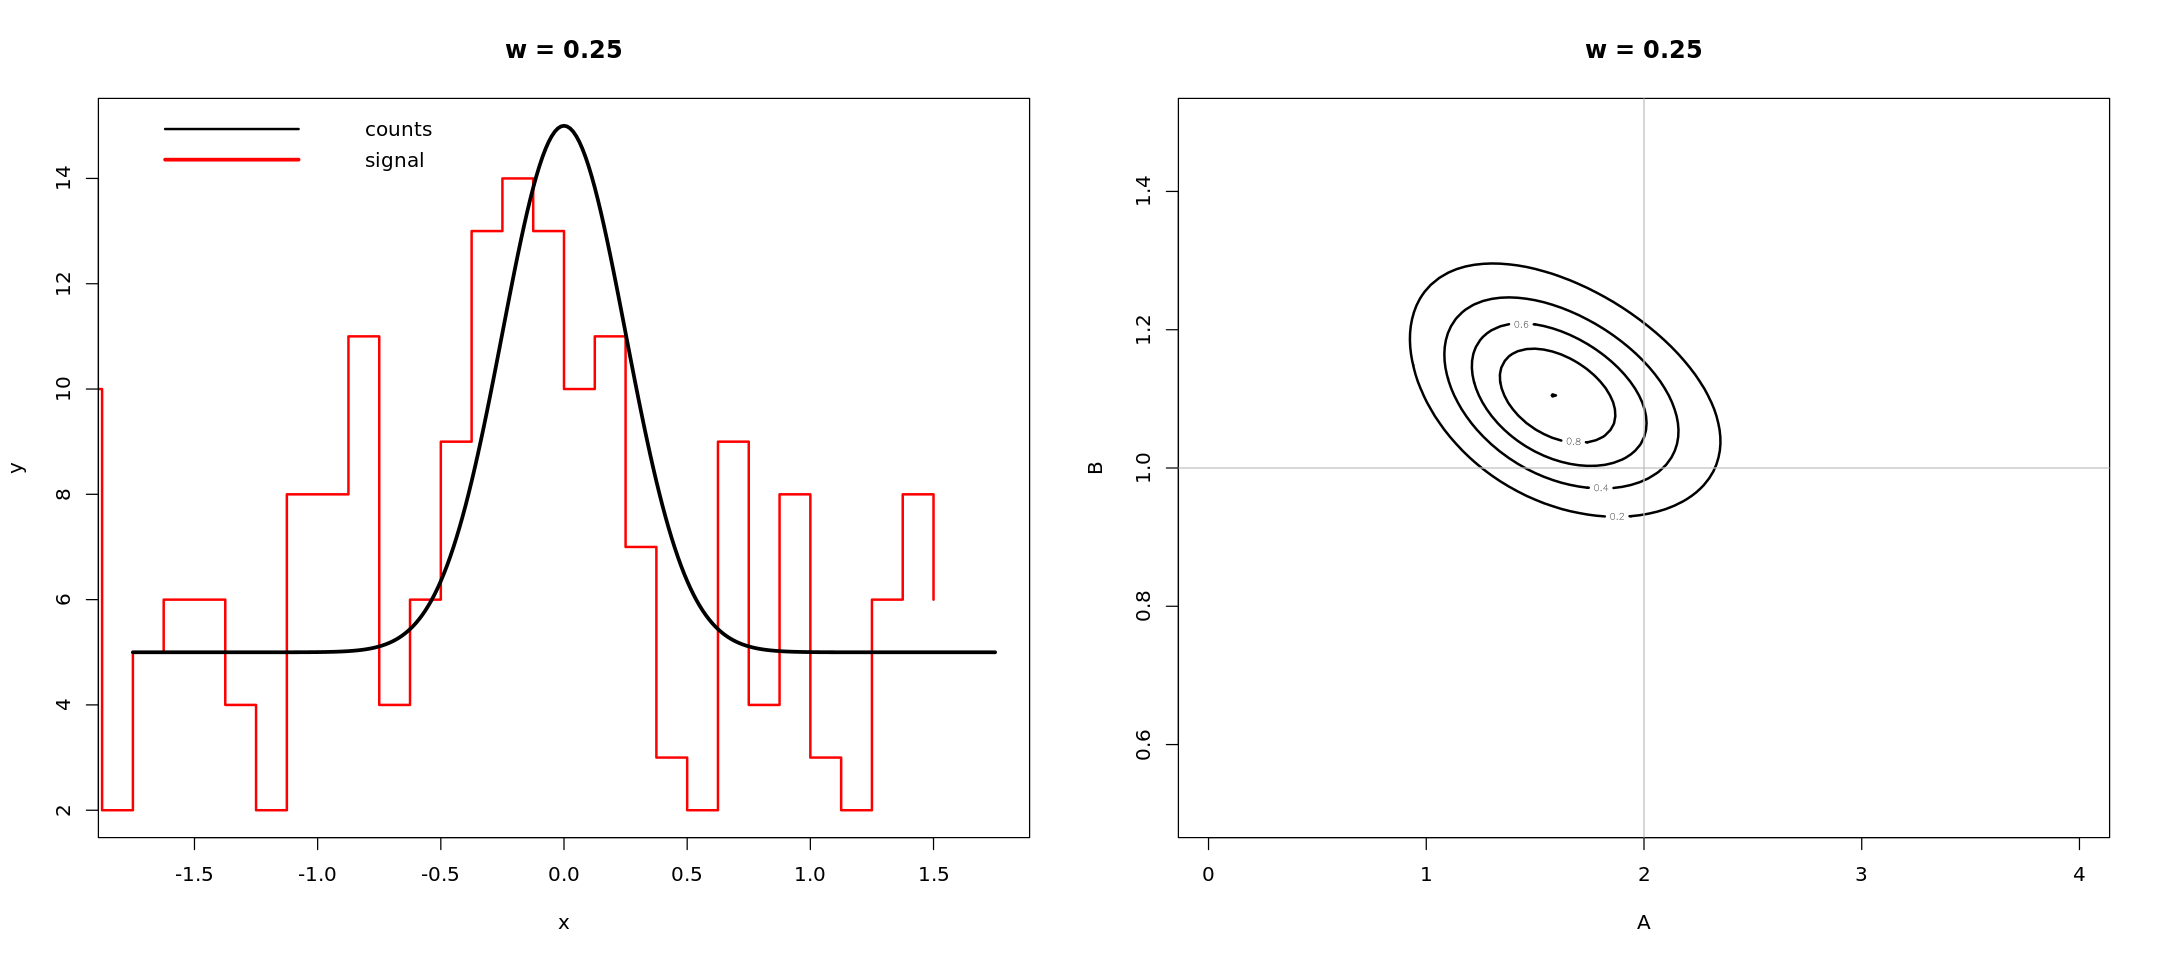

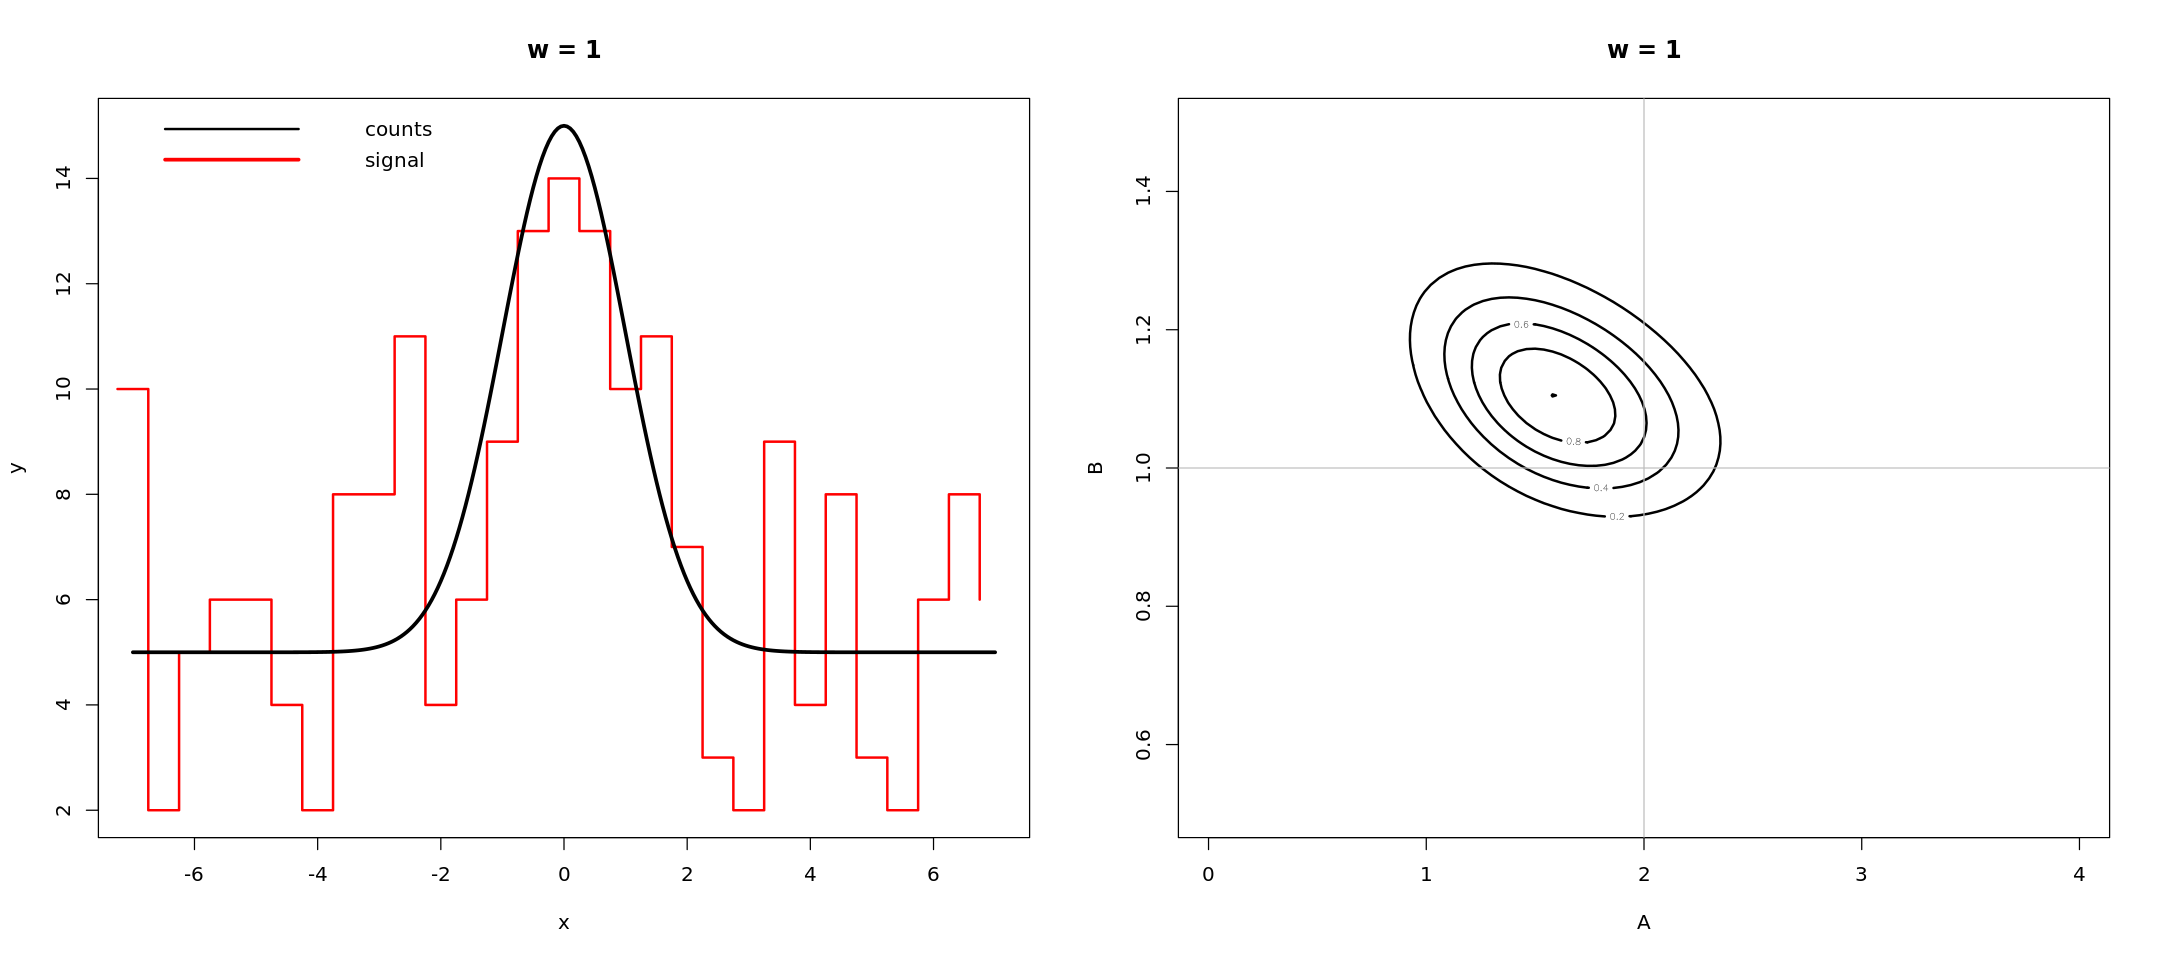

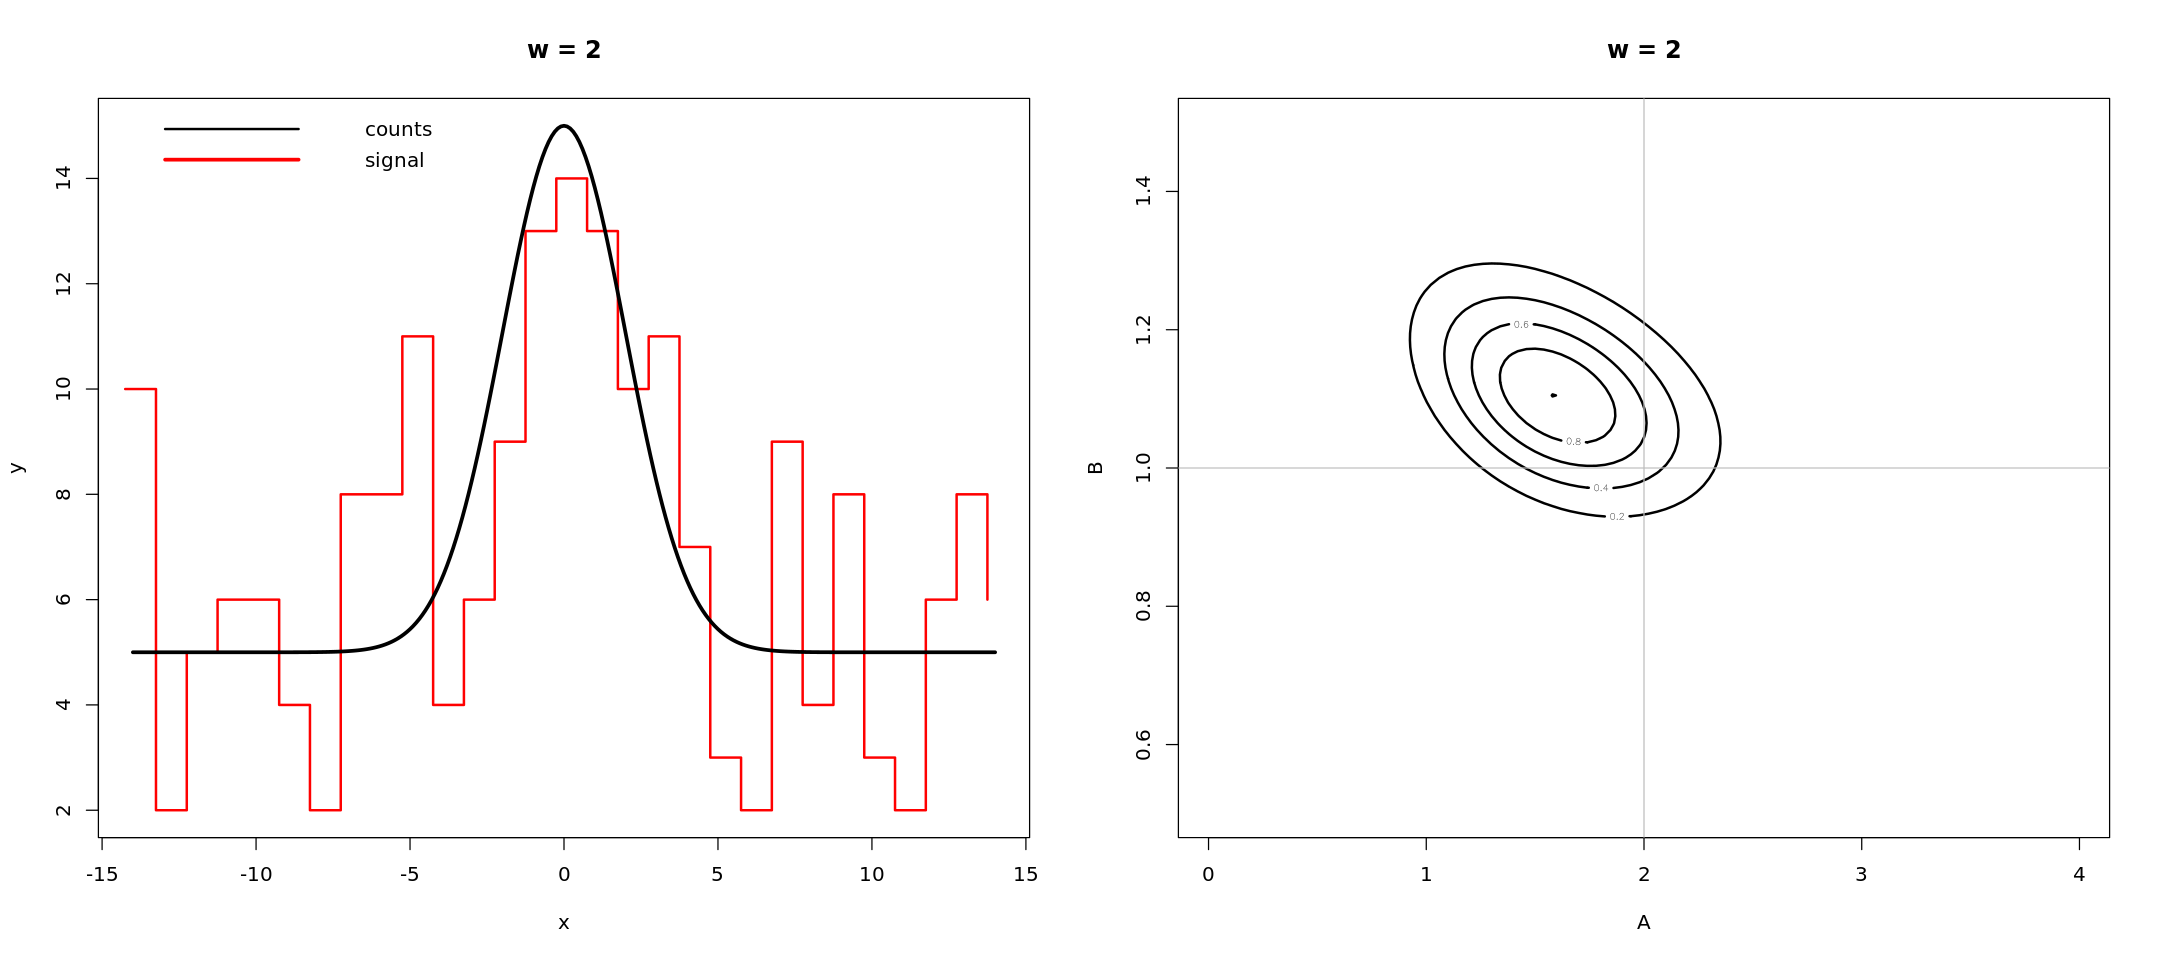

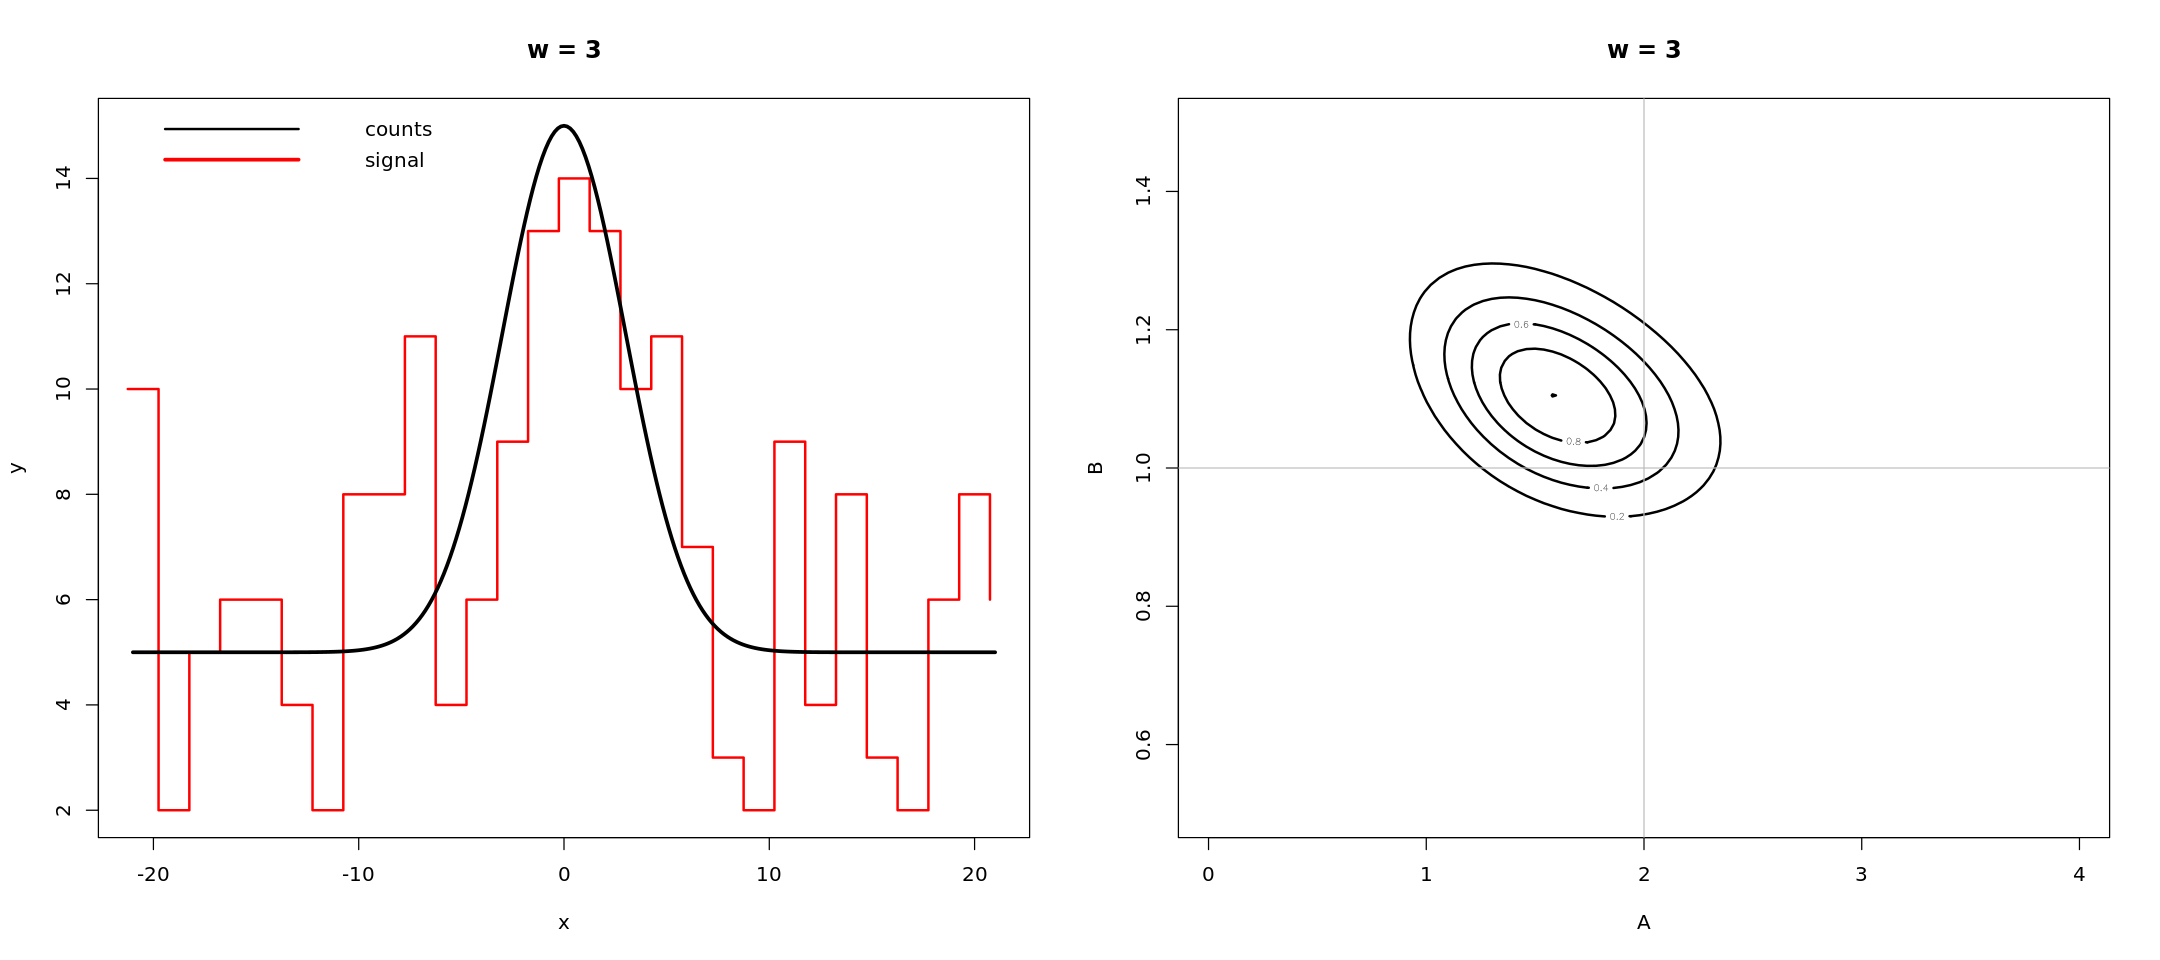

In [72]:
options(repr.plot.width=18, repr.plot.height=8)
par(mfrow=c(1,2)) 

w_vector<-c(0.1,0.25,1,2,3) 
A<-c()
B<-c()
sigmaA <- c()
sigmaB <- c()


for (w in w_vector){ 
    signal <- function (x, a, b, x0, w, t) {
    t * (a*exp (-(x-x0)^2/(2*w^2)) + b) }
    
    x0 <- 0 
    A_true <- 2 
    B_true <- 1 
    delta_t <- 5

    # - Generate the observed data
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal (xdat , A_true , B_true , x0, w, delta_t)
    ddat <- rpois( length (s.true), s.true)

    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A_true , B_true , x0, w, delta_t)
    xdat.off <- xdat -0.25
    plot(xdat.off , ddat ,xlab='x',ylab="y",type='s', main =paste('w =',w),
         col='red',lwd=2,xlim=range ( xplot), ylim= range (c(splot , ddat )))
    lines(xplot , splot , type='l',lwd=3)
    legend("topleft", legend=c("counts","signal"), col=c('black','red'), lty = c(1, 1), lwd=c(2,3), bty='n')
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2* Nsamp ),
    to=1-1/(2*Nsamp), by=1/ Nsamp )
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid
    log.post <- function (d, x, a, b, x0, w, t) {
    if(a<0 || b <0) { return (-Inf )} # the effect of the prior
    sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE )) }
    
    log_like <- matrix (data=NA , nrow= length(a), ncol= length (b))
    for(j in 1: length (a)) {
        for(k in 1: length (b)) {
            log_like[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, delta_t) } }

    # I compute the marginalized posteriors (+ normalize them)
    p_a_D <- apply(exp(log_like), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(log_like), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    # I compute the estimators
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)
    sd_a <- sqrt( delta_a * sum ((a-mean_a)^2 * p_a_D) )
    sd_b <- sqrt( delta_b * sum ((b-mean_b)^2 * p_b_D) )
    A<-append(A,mean_a)
    B<-append(B,mean_b)
    sigmaA<-append(sigmaA,sd_a)
    sigmaB<-append(sigmaB,sd_b)
    log_like <- log_like - max(log_like) 
    contour (a, b, exp(log_like), nlevels = 5, labcex = 0.5, lwd = 2, main =paste('w =',w), xlab="A", ylab="B")
    abline (v=2,h=1,col="grey")    }